In [1]:
import os
import torch
import numpy as np

import scanpy as sc
from anndata import AnnData
import anndata as ad

result_dir = "../edges/"
raw_type=False
use_edge=False

In [2]:
import matplotlib.pyplot as plt
# Set global font sizes using rcParams
plt.rcParams.update({
    'font.size': 18,            # Global font size
    'axes.titlesize': 20,       # Font size of the axes title
    'axes.labelsize': 20,       # Font size of the x and y labels
    'xtick.labelsize': 16,      # Font size of the x-tick labels
    'ytick.labelsize': 16,      # Font size of the y-tick labels
    'legend.fontsize': 18,      # Font size of the legend
    'figure.titlesize': 24      # Font size of the figure title
})

In [3]:
samples=['H20.33.001.CX28.MTG.02.007.1.02.02', 'H20.33.001.CX28.MTG.02.007.1.02.03', 'H20.33.001.Cx28.MTG.02.007.1.01.03', 'H20.33.004.Cx26.MTG.02.007.1.01.04', 'H20.33.004.Cx26.MTG.02.007.1.01.05', 'H20.33.004.Cx26.MTG.02.007.1.02.02', 'H20.33.004.Cx26.MTG.02.007.1.02.03', 'H20.33.004.Cx26.MTG.02.007.1.02.04', 'H20.33.012.Cx24.MTG.02.007.1.01.01', 'H20.33.012.Cx24.MTG.02.007.1.03.02', 'H20.33.012.Cx24.MTG.02.007.1.03.03', 'H20.33.015.CX24.MTG.02.007.1.03.01', 'H20.33.015.CX24.MTG.02.007.1.03.02', 'H20.33.015.Cx24.MTG.02.007.1.03.03', 'H20.33.025.Cx28.MTG.02.007.1.01.02', 'H20.33.025.Cx28.MTG.02.007.1.01.04', 'H20.33.025.Cx28.MTG.02.007.1.01.06', 'H20.33.035.Cx26.MTG.02.007.1.01.03', 'H20.33.035.Cx26.MTG.02.007.1.01.04', 'H20.33.040.Cx25.MTG.02.007.1.01.03', 'H20.33.040.Cx25.MTG.02.007.1.01.04', 'H20.33.044.Cx26.MTG.02.007.1.01.02', 'H20.33.044.Cx26.MTG.02.007.1.01.03', 'H20.33.044.Cx26.MTG.02.007.1.01.04', 'H21.33.001.Cx22.MTG.02.007.1.01.03', 'H21.33.001.Cx22.MTG.02.007.1.01.04', 'H21.33.005.Cx18.MTG.02.007.02.03', 'H21.33.005.Cx18.MTG.02.007.02.04', 'H21.33.006.Cx28.MTG.02.007.1.01.09.02', 'H21.33.006.Cx28.MTG.02.007.1.01.09.03', 'H21.33.006.Cx28.MTG.02.007.1.01.09.04', 'H21.33.011.Cx26.MTG.02.007.3.01.04', 'H21.33.011.Cx26.MTG.02.007.3.01.05', 'H21.33.011.Cx26.MTG.02.007.3.01.06', 'H21.33.012.Cx26.MTG.02.007.1.01.04', 'H21.33.012.Cx26.MTG.02.007.1.01.05', 'H21.33.012.Cx26.MTG.02.007.1.01.06', 'H21.33.013.Cx24.MTG.02.007.1.06', 'H21.33.014.CX26.MTG.02.007.1.02.02', 'H21.33.015.Cx26.MTG.02.007.1.0', 'H21.33.015.Cx26.MTG.02.007.1.1', 'H21.33.015.Cx26.MTG.02.007.1.2', 'H21.33.016.Cx26.MTG.02.007.3.01.01', 'H21.33.016.Cx26.MTG.02.007.3.01.02', 'H21.33.016.Cx26.MTG.02.007.3.01.03', 'H21.33.019.Cx30.MTG.02.007.5.0', 'H21.33.019.Cx30.MTG.02.007.5.01.01', 'H21.33.019.Cx30.MTG.02.007.5.01.02', 'H21.33.021.Cx26.MTG.02.007.1.04', 'H21.33.021.Cx26.MTG.02.007.1.06', 'H21.33.022.Cx26.MTG.02.007.2.M.02', 'H21.33.022.Cx26.MTG.02.007.2.M.03', 'H21.33.022.Cx26.MTG.02.007.2.M.04', 'H21.33.023.Cx26.MTG.02.007.1.03.01', 'H21.33.023.Cx26.MTG.02.007.1.03.04', 'H21.33.023.Cx26.MTG.02.007.1.03.05', 'H21.33.025.CX26.MTG.02.007.4.01.02', 'H21.33.025.CX26.MTG.02.007.4.01.04', 'H21.33.025.CX26.MTG.02.007.4.01.06', 'H21.33.028.CX28.MTG.02.007.1.01.01', 'H21.33.028.Cx28.MTG.02.007.1.02.02', 'H21.33.028.Cx28.MTG.02.007.1.02.04', 'H21.33.031.CX24.MTG.02.007.1.01.01', 'H21.33.031.CX24.MTG.02.007.1.01.02', 'H21.33.032.CX24.MTG.02.007.1.01.04', 'H21.33.038.Cx20.MTG.02.007.3.01.02', 'H21.33.038.Cx20.MTG.02.007.3.01.04', 'H21.33.040.Cx22.MTG.02.007.3.03.01', 'H21.33.040.Cx22.MTG.02.007.3.03.03', 'H21.33.040.Cx22.MTG.02.007.3.03.04']
sample='H20.33.001.CX28.MTG.02.007.1.02.03'
data_dir = "../../data/AD/processed1/"
str_position_x='centerx'
str_position_y='centery'
str_cell_type='subclass'
cell_types=['Astrocyte', 'Chandelier', 'Endothelial', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Lamp5 Lhx6', 'Microglia-PVM', 'OPC', 'Oligodendrocyte', 'Pax6', 'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip']

genes = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")
type_exp_dict=np.load(data_dir + sample + "_TypeExp.npz", allow_pickle=True)

tensor([-1.2311e-02, -3.2644e-04,  5.0276e-04,  2.1738e-04,  2.5603e-05,
        -3.6171e-04, -7.2746e-05, -6.4600e-04, -6.7462e-04, -7.5886e-04,
        -7.8714e-04, -7.5475e-04, -7.2937e-04, -8.3107e-04, -9.8028e-04,
        -1.0367e-03, -8.4908e-04, -9.4991e-04, -8.3991e-04, -8.2834e-04,
        -8.1198e-04, -9.8594e-04, -8.3439e-04, -9.1699e-04, -8.5518e-04,
        -7.6315e-04, -9.5367e-04, -7.6928e-04, -7.8752e-04, -8.8871e-04,
        -7.9036e-04, -9.5188e-04, -8.6250e-04, -6.1452e-04, -7.3861e-04,
        -9.5716e-04, -1.0097e-03, -1.1298e-03, -1.0479e-03, -6.9368e-04,
        -5.8582e-04, -7.7456e-04, -9.1274e-04, -1.0141e-03, -8.4219e-04,
        -9.6373e-04, -7.9814e-04, -8.4001e-04, -8.4918e-04])
loss: tensor(0.2216)
random: tensor(0.2532)
first 5: tensor(0.2393)
first 10: tensor(0.2357)
first 20: tensor(0.2298)
first 30: tensor(0.2257)
first 40: tensor(0.2231)
first 50: tensor(0.2216)
torch.Size([15222, 49]) tensor([[0.0371, 0.0061, 0.0170,  ..., 0.0024, 0.0138, 0.0084],
 

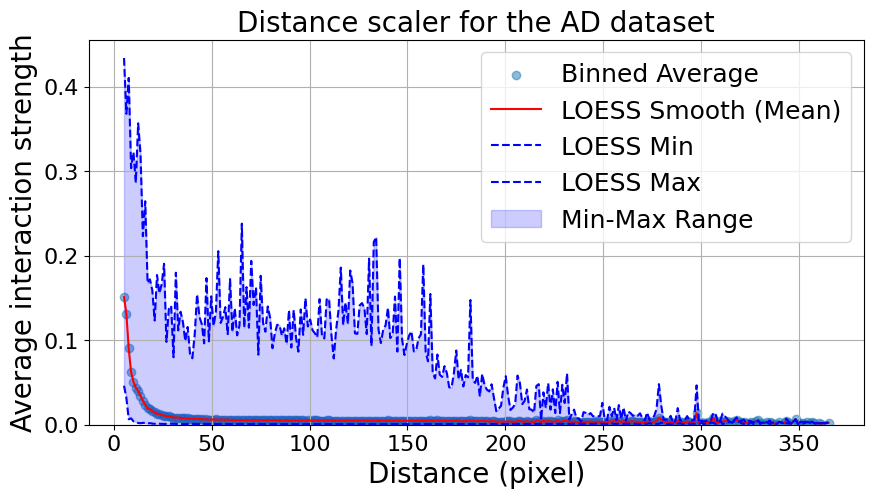

In [6]:
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_binned_average_with_loess(x, y, bins=300, frac=0.013):
    # Compute bin-wise statistics: mean, min, and max
    bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=bins)
    bin_mins, _, _ = binned_statistic(x, y, statistic='min', bins=bins)
    bin_maxs, _, _ = binned_statistic(x, y, statistic='max', bins=bins)

    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Calculate LOESS smoothing for the mean, min, and max
    lowess = sm.nonparametric.lowess
    smoothed_mean = lowess(bin_means, bin_centers, frac=frac)
    smoothed_min = lowess(bin_mins, bin_centers, frac=frac)
    smoothed_max = lowess(bin_maxs, bin_centers, frac=frac)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(bin_centers, bin_means, alpha=0.5, label='Binned Average')
    plt.plot(smoothed_mean[:, 0], smoothed_mean[:, 1], 'r-', label='LOESS Smooth (Mean)')
    plt.plot(smoothed_min[:, 0], smoothed_min[:, 1], 'b--', label='LOESS Min')
    plt.plot(smoothed_max[:, 0], smoothed_max[:, 1], 'b--', label='LOESS Max')
    plt.fill_between(smoothed_mean[:, 0], smoothed_min[:, 1], smoothed_max[:, 1], color='b', alpha=0.2, label='Min-Max Range')

    plt.title("Distance scaler for the AD dataset")
    plt.xlabel("Distance (pixel)")
    plt.ylabel("Average interaction strength")
    if np.min(y) >= 0:
        plt.ylim(bottom=0)  # Set y-axis to start from 0
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_distance_info(sample,gene="all",use_rank=False,cumsum=False,cumsum_proportion=False,use_y_pred=False,filter_small=False):
    results=torch.load(result_dir+"edges_"+sample+".pth",map_location=torch.device('cpu'))
    attention_scores=results["attention_score"]/8
    
    print(torch.mean(attention_scores[:,:,86],dim=0))
    print("loss:",torch.mean(torch.square(results["y_pred"]-results["y"])))
    print("random:",torch.mean(torch.square(results["y"])))
    print("first 5:",torch.mean(torch.square(torch.sum(attention_scores[:,:5,:],dim=1)-results["y"])))
    print("first 10:",torch.mean(torch.square(torch.sum(attention_scores[:,:10,:],dim=1)-results["y"])))
    print("first 20:",torch.mean(torch.square(torch.sum(attention_scores[:,:20,:],dim=1)-results["y"])))
    print("first 30:",torch.mean(torch.square(torch.sum(attention_scores[:,:30,:],dim=1)-results["y"])))
    print("first 40:",torch.mean(torch.square(torch.sum(attention_scores[:,:40,:],dim=1)-results["y"])))
    print("first 50:",torch.mean(torch.square(torch.sum(attention_scores,dim=1)-results["y"])))

    proportion=torch.abs(attention_scores)
    
    if filter_small:
        tmp=proportion/torch.sum(proportion,dim=1,keepdim=True)
        proportion[tmp<0.02]=0

    #print(torch.mean(torch.abs(attention_scores)))
    #proportion=proportion/torch.sum(proportion,dim=1,keepdim=True)
    
    if gene=="all":
        proportion=torch.mean(proportion,dim=-1)
    else:
        proportion=proportion[:,:,genes.index(gene)]

    if cumsum:
        proportion=np.cumsum(proportion,axis=-1)

    if cumsum_proportion:
        cumsum_y=np.cumsum(attention_scores,axis=-2)
        if use_y_pred:
            y=results["y_pred"]
        else:
            y=results["y"]
        print(torch.mean(torch.square(results["y"]-results["y_pred"])))
        y=y.unsqueeze(dim=1)
        y=y.numpy()
        proportion=cumsum_y/y/8
        if gene=="all":
            proportion=torch.mean(proportion,dim=-1)
        else:
            proportion=proportion[:,:,genes.index(gene)]
    
    print(proportion.shape,proportion,torch.sum(proportion,dim=1))

    position_xs=results["position_x"][:,1:]
    position_ys=results["position_y"][:,1:]
    position_x0=results["position_x"][:,0:1]
    position_y0=results["position_y"][:,0:1]
    distances=torch.sqrt(torch.square(position_xs-position_x0)+torch.square(position_ys-position_y0))

    proportion=proportion.flatten().numpy()
    distance=distances.flatten().numpy()

    if use_rank:
        n=attention_scores.shape[1]
        tmp=np.arange(n)+1
        distance=np.tile(tmp, (attention_scores.shape[0], 1)).flatten()
    
    print(distance.shape,proportion.shape)
    plot_binned_average_with_loess(distance,proportion)

plot_distance_info(sample) 

tensor([-1.2311e-02, -3.2644e-04,  5.0276e-04,  2.1738e-04,  2.5603e-05,
        -3.6171e-04, -7.2746e-05, -6.4600e-04, -6.7462e-04, -7.5886e-04,
        -7.8714e-04, -7.5475e-04, -7.2937e-04, -8.3107e-04, -9.8028e-04,
        -1.0367e-03, -8.4908e-04, -9.4991e-04, -8.3991e-04, -8.2834e-04,
        -8.1198e-04, -9.8594e-04, -8.3439e-04, -9.1699e-04, -8.5518e-04,
        -7.6315e-04, -9.5367e-04, -7.6928e-04, -7.8752e-04, -8.8871e-04,
        -7.9036e-04, -9.5188e-04, -8.6250e-04, -6.1452e-04, -7.3861e-04,
        -9.5716e-04, -1.0097e-03, -1.1298e-03, -1.0479e-03, -6.9368e-04,
        -5.8582e-04, -7.7456e-04, -9.1274e-04, -1.0141e-03, -8.4219e-04,
        -9.6373e-04, -7.9814e-04, -8.4001e-04, -8.4918e-04])
loss: tensor(0.2216)
random: tensor(0.2532)
first 5: tensor(0.2393)
first 10: tensor(0.2357)
first 20: tensor(0.2298)
first 30: tensor(0.2257)
first 40: tensor(0.2231)
first 50: tensor(0.2216)
torch.Size([15222, 49]) tensor([[0.0187, 0.0180, 0.0024,  ..., 0.0083, 0.0392, 0.0071],
 

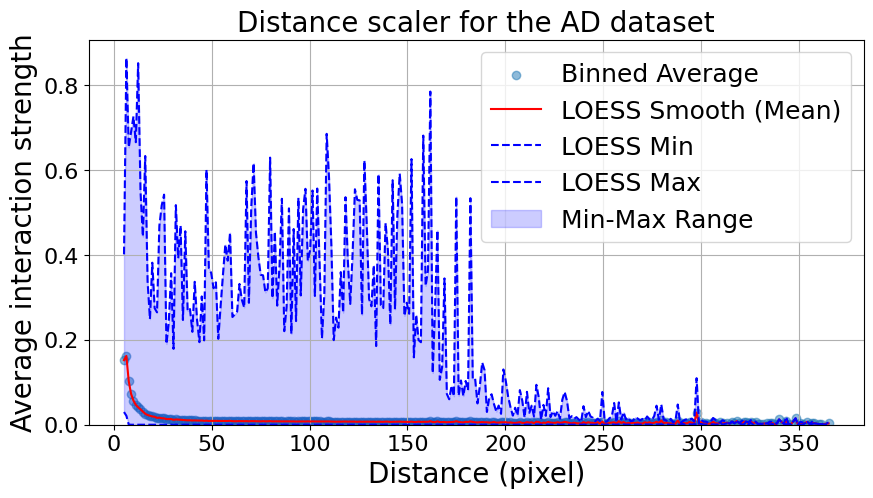

In [7]:
plot_distance_info(sample,"RORB") 

tensor([-1.2311e-02, -3.2644e-04,  5.0276e-04,  2.1738e-04,  2.5603e-05,
        -3.6171e-04, -7.2746e-05, -6.4600e-04, -6.7462e-04, -7.5886e-04,
        -7.8714e-04, -7.5475e-04, -7.2937e-04, -8.3107e-04, -9.8028e-04,
        -1.0367e-03, -8.4908e-04, -9.4991e-04, -8.3991e-04, -8.2834e-04,
        -8.1198e-04, -9.8594e-04, -8.3439e-04, -9.1699e-04, -8.5518e-04,
        -7.6315e-04, -9.5367e-04, -7.6928e-04, -7.8752e-04, -8.8871e-04,
        -7.9036e-04, -9.5188e-04, -8.6250e-04, -6.1452e-04, -7.3861e-04,
        -9.5716e-04, -1.0097e-03, -1.1298e-03, -1.0479e-03, -6.9368e-04,
        -5.8582e-04, -7.7456e-04, -9.1274e-04, -1.0141e-03, -8.4219e-04,
        -9.6373e-04, -7.9814e-04, -8.4001e-04, -8.4918e-04])
loss: tensor(0.2216)
random: tensor(0.2532)
first 5: tensor(0.2393)
first 10: tensor(0.2357)
first 20: tensor(0.2298)
first 30: tensor(0.2257)
first 40: tensor(0.2231)
first 50: tensor(0.2216)
torch.Size([15222, 49]) tensor([[0.0371, 0.0061, 0.0170,  ..., 0.0024, 0.0138, 0.0084],
 

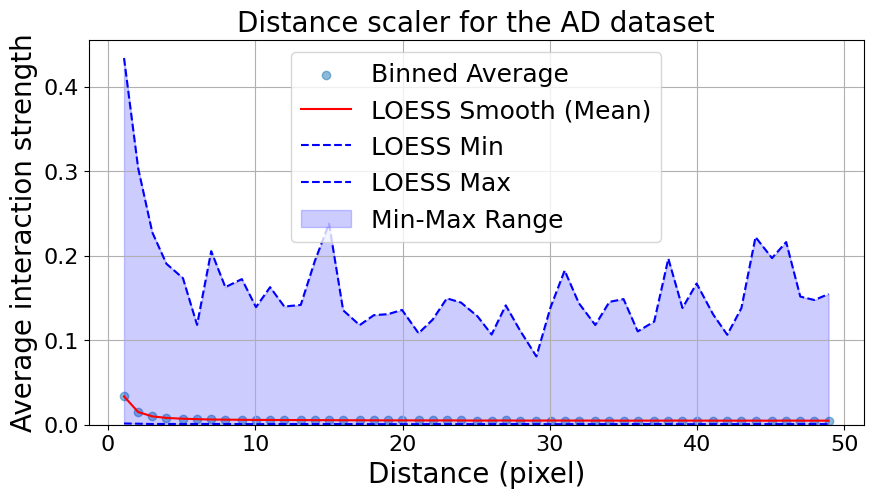

In [8]:
plot_distance_info(sample,use_rank=True) 

torch.Size([15222, 49]) tensor([[0.0973, 0.1137, 0.1580,  ..., 0.9417, 0.9787, 1.0000],
        [0.1931, 0.3258, 0.3503,  ..., 0.9713, 0.9773, 1.0000],
        [0.0580, 0.1209, 0.1475,  ..., 0.9902, 0.9961, 1.0000],
        ...,
        [0.0219, 0.0505, 0.0910,  ..., 0.9050, 0.9903, 1.0000],
        [0.0384, 0.0490, 0.0660,  ..., 0.9848, 0.9922, 1.0000],
        [0.1395, 0.1766, 0.1977,  ..., 0.9716, 0.9768, 1.0000]]) tensor([28.7511, 32.8348, 32.7066,  ..., 23.9707, 27.2857, 28.0304])
(745878,) (745878,)


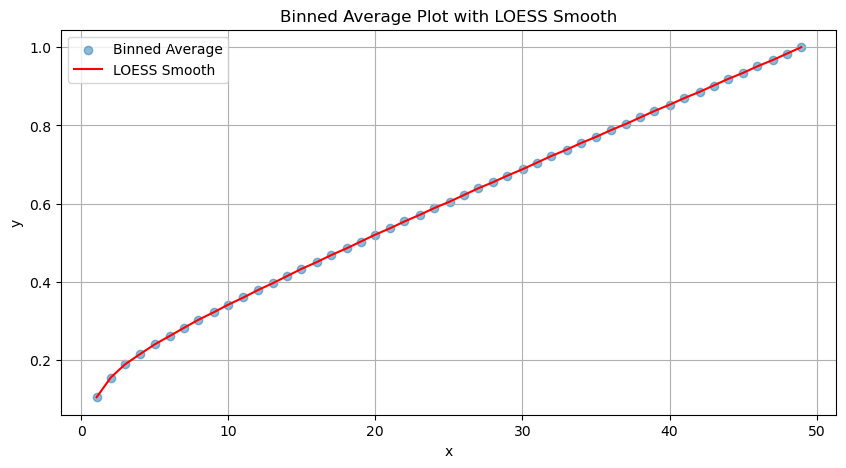

In [6]:
plot_distance_info(sample,use_rank=True,cumsum=True) 

torch.Size([15222, 49]) tensor([[0.1311, 0.1445, 0.2015,  ..., 0.9305, 0.9776, 1.0000],
        [0.2741, 0.4624, 0.4917,  ..., 0.9750, 0.9757, 1.0000],
        [0.0746, 0.1562, 0.1847,  ..., 0.9998, 1.0000, 1.0000],
        ...,
        [0.0221, 0.0558, 0.1086,  ..., 0.8814, 0.9973, 1.0000],
        [0.0502, 0.0559, 0.0714,  ..., 0.9977, 0.9985, 1.0000],
        [0.1824, 0.2272, 0.2482,  ..., 0.9769, 0.9771, 1.0000]]) tensor([30.4234, 36.6030, 35.6368,  ..., 23.5902, 28.6453, 29.3718])
(745878,) (745878,)


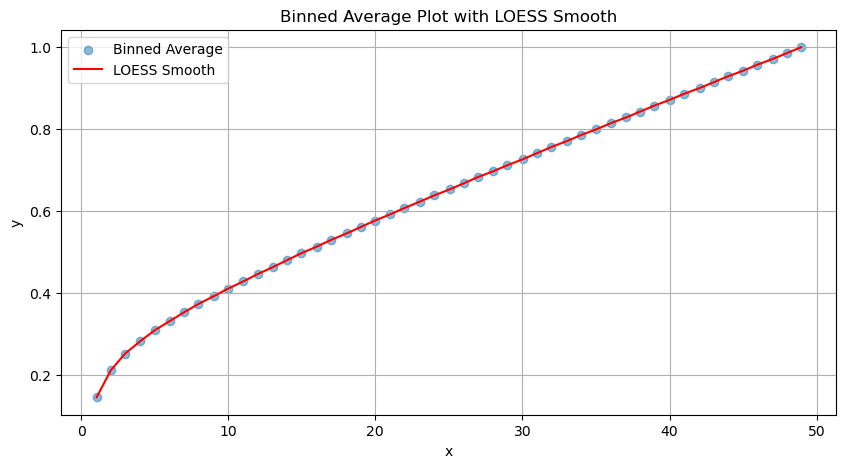

In [7]:
plot_distance_info(sample,use_rank=True,cumsum=True,filter_small=True) 

tensor(0.2216)
torch.Size([15222, 49]) tensor([[ 5.6440e-02,  2.3158e-03, -5.0601e-03,  ..., -7.0617e-02,
          4.7345e-02,  6.8869e-02],
        [ 1.3351e-01,  7.4673e-02,  1.0063e-01,  ...,  5.5425e-01,
          5.6382e-01,  5.6178e-01],
        [ 7.4810e-02,  2.1042e-01,  2.7367e-01,  ...,  2.3672e+00,
          2.3651e+00,  2.3710e+00],
        ...,
        [ 2.1701e-02,  3.6820e-02, -3.8230e-03,  ..., -9.7986e-02,
         -6.5118e-02, -6.3537e-02],
        [ 9.9889e-03,  2.5867e-02,  8.1099e-02,  ...,  1.7343e-02,
          9.9593e-03,  1.2901e-02],
        [-3.3503e-02, -1.8168e-02, -1.4092e-02,  ...,  2.8876e-01,
          2.9167e-01,  3.2641e-01]]) tensor([ 1.9264, 19.1536, 79.8765,  ..., -3.4500,  0.2068,  7.8043])
(745878,) (745878,)


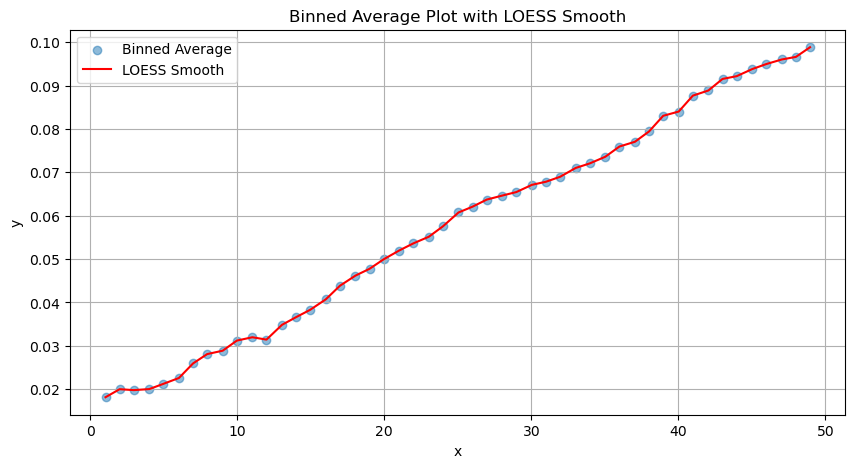

In [8]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,gene="RORB")

tensor(0.2216)
torch.Size([15222, 49]) tensor([[-2.3501e-01, -3.6311e-01, -4.2329e-02,  ...,  6.2570e-01,
          8.3294e-01,  1.0000e+00],
        [ 1.9199e+00,  4.4589e+00,  4.5290e+00,  ...,  1.4293e+00,
          1.4046e+00,  1.0000e+00],
        [-1.0721e-01, -5.3573e-03,  3.6537e-02,  ...,  9.9918e-01,
          9.9808e-01,  1.0000e+00],
        ...,
        [-4.9845e-02, -9.2119e-02,  8.4281e-02,  ...,  5.5089e-01,
          9.6023e-01,  1.0000e+00],
        [ 1.4050e-02,  4.2756e-02,  1.1390e-01,  ...,  9.8288e-01,
          9.9640e-01,  1.0000e+00],
        [-1.8603e-01,  1.7984e-06,  4.4995e-02,  ...,  8.2376e-01,
          8.2159e-01,  1.0000e+00]]) tensor([ 37.4494, 177.5709,  31.3750,  ...,   7.7009,  24.3811,  19.2560])
(745878,) (745878,)


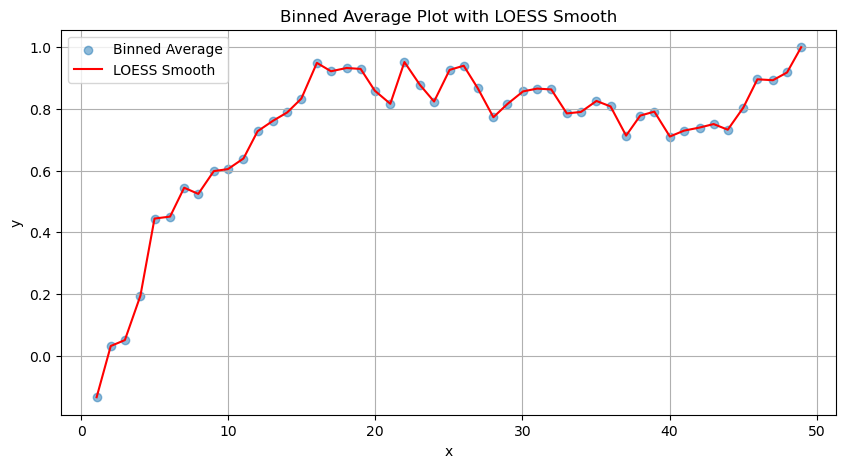

In [9]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,use_y_pred=True)

tensor(0.2216)
torch.Size([15222, 49]) tensor([[ 0.8195,  0.0336, -0.0735,  ..., -1.0254,  0.6875,  1.0000],
        [ 0.2377,  0.1329,  0.1791,  ...,  0.9866,  1.0036,  1.0000],
        [ 0.0316,  0.0887,  0.1154,  ...,  0.9984,  0.9975,  1.0000],
        ...,
        [-0.3416, -0.5795,  0.0602,  ...,  1.5422,  1.0249,  1.0000],
        [ 0.7743,  2.0050,  6.2862,  ...,  1.3443,  0.7720,  1.0000],
        [-0.1026, -0.0557, -0.0432,  ...,  0.8846,  0.8936,  1.0000]]) tensor([27.9710, 34.0943, 33.6887,  ..., 54.2985, 16.0268, 23.9092])
(745878,) (745878,)


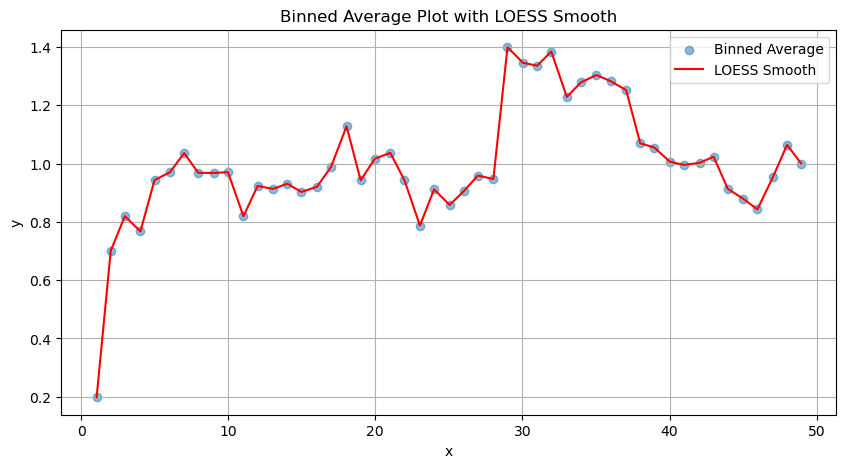

In [10]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,use_y_pred=True,gene="RORB")

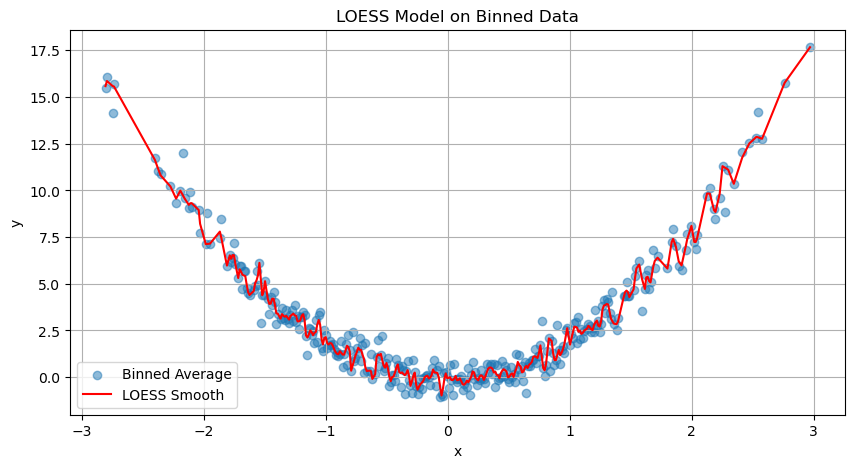

TypeError: 'function' object is not subscriptable

In [11]:
from scipy.stats import binned_statistic
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def prepare_loess_model(x, y, bins=500, frac=0.013):
    # Bin data and compute average y for each bin
    bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=bins)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Calculate the smooth curve using Lowess
    lowess = sm.nonparametric.lowess
    smoothed_data = lowess(bin_means, bin_centers, frac=frac)
    
    # Plotting for visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(bin_centers, bin_means, alpha=0.5, label='Binned Average')
    plt.plot(smoothed_data[:, 0], smoothed_data[:, 1], 'r-', label='LOESS Smooth')
    plt.title("LOESS Model on Binned Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the fitted LOESS model for prediction
    return lowess

def predict_with_loess_model(loess_model, new_x):
    # Predict using the fitted LOESS model
    # Find the nearest points and perform linear interpolation
    x_values = loess_model[:, 0]
    y_values = loess_model[:, 1]
    if new_x < x_values[0] or new_x > x_values[-1]:
        raise ValueError("New x value is out of the bounds of the x values in the model.")
    else:
        return np.interp(new_x, x_values, y_values)

# Example usage
x = np.random.normal(0, 1, 1000)
y = 2 * x**2 + np.random.normal(0, 1, 1000)

# Prepare the model
loess_model = prepare_loess_model(x, y)

# Predict for a new x value
new_x = 0.5
predicted_y = predict_with_loess_model(loess_model, new_x)
print(f"The predicted y value for x = {new_x} is {predicted_y}")
